In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import os
from prepare_data import prepare_input

/home/haivubui/anaconda3/envs/mot/lib/python3.8/site-packages/numba/cuda/cudadrv/devicearray.py:886: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


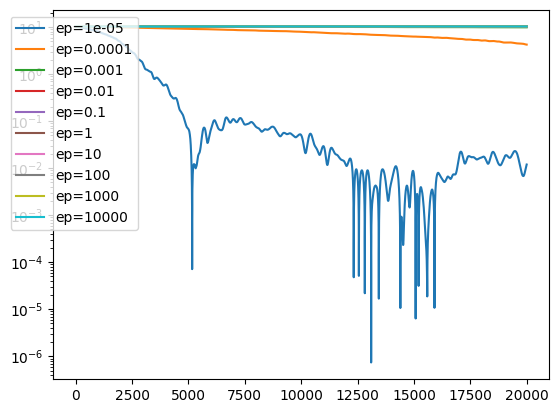

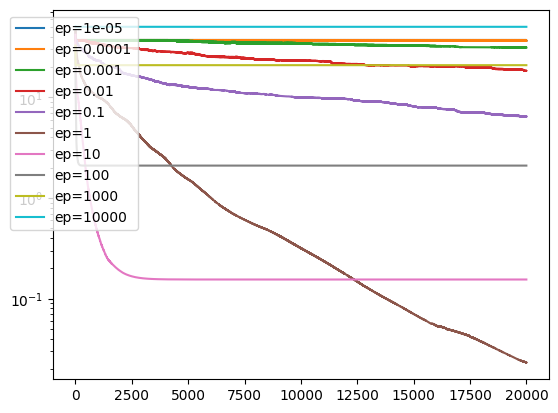

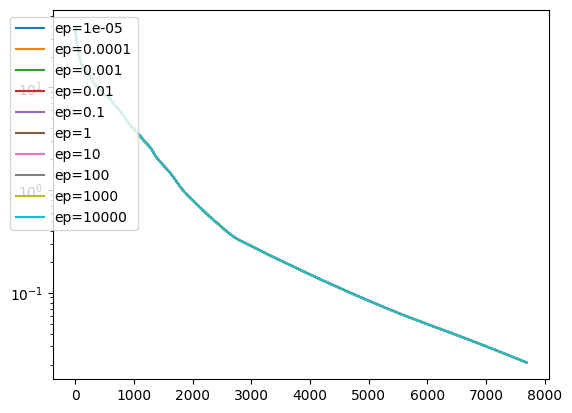

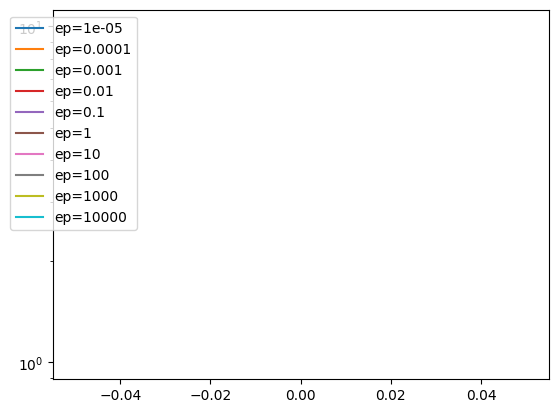

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


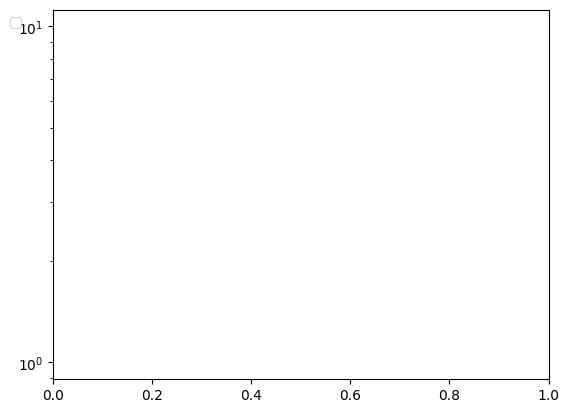

In [48]:
#input ground truth
data_folder = 'data/size60/seed20/'
X = np.fromfile(data_folder + 'exp_number0.npy')
Cost, p, q, s = prepare_input(N=10)
x0 = np.tensordot(p, np.tensordot(q, s, 0), 0)
opt = (X * Cost.reshape(-1)).sum().item()

algs=['M','A','B','C','D']
for alg in algs:
    #input A
    max_iter = 20000

    output_folder = 'output_test/'+'max_iter-'+f'{max_iter}'
    save_folder=os.path.join(output_folder,f'{alg}-{max_iter}')

    plt.figure()
    for i in range(-10,10):
        ep=10**i
        name=os.path.join(save_folder,f'{alg}_Obj_list_ep{ep}'+'.npy')
        if os.path.exists(name):
            Obj_list = np.load(name)
        else:
            continue
        plt.plot(abs(Obj_list-opt),label=f'ep={ep}')
    # plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
    plt.yscale('log')

    plt.show()

In [34]:
for i in [1,2,3]:
    for j in [4,5,6]:
        if j==5:
            continue
        print(i,j)

1 4
1 6
2 4
2 6
3 4
3 6


In [11]:
Obj_list

array([1.87585069e-309, 1.17119999e+171, 5.22741680e-037, ...,
       6.06862846e+001, 6.06862846e+001, 6.06862846e+001])